# Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from sklearn.linear_model import LogisticRegression
from scipy.optimize import minimize
import warnings
#warnings.filterwarnings("ignore")
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Simulate data

In [2]:
N=1000 # number of observation


In [3]:
x1=stats.norm(20, 5).rvs(N) # covariate 1
x2=stats.norm(10, 5).rvs(N) # covariate 2

In [4]:
# structure on treatment determination
# random treatment assignment
# 20% of sample being treated
t=[]
for i in range(N):
    if stats.uniform(0, 1).rvs(1)>0.8:
        t.append(1)
    else:
        t.append(0)

In [5]:
dose=stats.norm(0.8, 0.2).rvs(N) # generate random dose, better be normal for HI model



In [6]:
for i in range(len(dose)):
    if t[i]==0:
        dose[i]=0 # changing dose for control group

In [7]:
# 
y=[7+0.5*a+1.5*b+5*c*d for a, b, c, d in zip(x1, x2, t, dose)] 
# error not added yet, note the slope of ADRF would be 5

In [8]:
y=y+stats.norm(0, 3).rvs(N) # adding error term, now this is the outcome variable

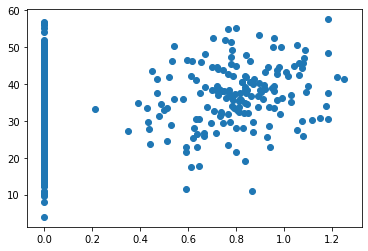

In [9]:
plt.scatter(dose, y)
plt.show() # spike at zero

# Dose model and generate required variables from this model

In [10]:
x=np.column_stack((x1, x2))

In [11]:
reg1=LinearRegression()
reg1f=reg1.fit(x, dose)

In [12]:
mu1=reg1f.predict(x) # fitted values, dose hat

In [13]:
e=dose-mu1 #residual from dose model

In [14]:
shat=(e.T@e)/(N-3)

In [15]:
shat

0.09681307911136507

In [16]:
sh=shat*np.ones((N, 1)) #vector

In [17]:
Rhat=[stats.norm(a, b).pdf(1) for a, b in zip(mu1, sh)]

In [18]:
Rhat=np.asarray(Rhat)

In [19]:
dosesq=dose**2
Rhatsq=Rhat**2
inter=[a*b for a, b in zip(dose, Rhat)] # interaction term for the outcome model

# outcome model

In [20]:
X=np.column_stack((dose, dosesq, Rhat, Rhatsq, inter))

In [21]:
reg2=LinearRegression()
reg2f=reg2.fit(X, y)

# Plot ADRF

In [22]:

out2=[]
td=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for t in td:
    fl2=[]
    tsq=t**2

    for i in range(N):
        loc1=mu1[i]
        
        
        r=stats.norm(loc1, shat).pdf(1)
        rsq=r**2
        inter=t*r
        f=reg2f.predict(np.asarray([t, tsq, r, rsq, inter]).reshape(1, 5))
        fl2.append(f)
    
    out2.append(np.mean(fl2))
        
        

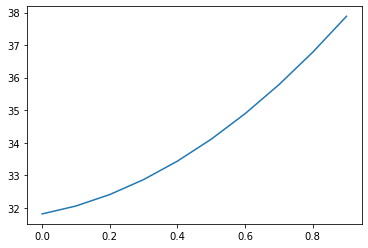

In [23]:
plt.plot(td, out2)
plt.show() #slope looks like what we expected.